In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [55]:
pip install random 

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [3]:
dataset=pd.read_csv('C:/Users/Akhil.pathak/Desktop/Study_Material/VIT/SPCUP-2020/_slash_mavros_slash_global_position_slash_raw_slash_gps_vel.csv')
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')
dataset.head()
if set(['date']).issubset(dataset.columns):
    dataset.drop(['date'],axis=1, inplace=True)
    
dataset.head()

,rosbagtimestamp,seq,secs,nsecs,xl,yl,zl,normality
0,1.570000e+18,53,1574069785,858138123,-0.137454,0.184408,0,1
1,1.570000e+18,54,1574069786,110338604,-0.251003,0.336746,0,1
2,1.570000e+18,55,1574069786,356408699,-0.107573,0.144320,0,1
3,1.570000e+18,56,1574069786,578747487,-0.155383,0.208462,0,1
4,1.570000e+18,57,1574069786,823320336,-0.011953,0.016036,0,1


In [4]:

ds = dataset
ds.head()

,rosbagtimestamp,seq,secs,nsecs,xl,yl,zl,normality
0,1.570000e+18,53,1574069785,858138123,-0.137454,0.184408,0,1
1,1.570000e+18,54,1574069786,110338604,-0.251003,0.336746,0,1
2,1.570000e+18,55,1574069786,356408699,-0.107573,0.144320,0,1
3,1.570000e+18,56,1574069786,578747487,-0.155383,0.208462,0,1
4,1.570000e+18,57,1574069786,823320336,-0.011953,0.016036,0,1


In [7]:
x = ds.iloc[:,4:7]
y = ds.iloc[:,7:8]
x1 = x.iloc[:,0]
x2 = x.iloc[:,1]


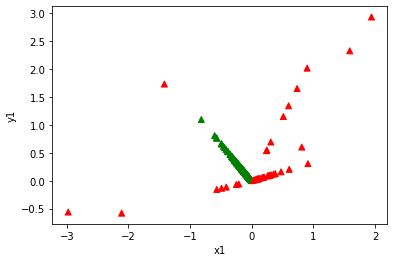

In [10]:
# Actual plot for normal and abnormal dataset
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'}
ax.scatter(ds['xl'], ds['yl'], c=ds['normality'].apply(lambda x: colors[x]), marker = '^')
plt.xlabel('x1')
plt.ylabel('y1')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=6)
Kmean.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
Kmean.cluster_centers_

array([[-0.08499796,  0.10860689,  0.        ],
       [ 0.68475334,  1.54232588,  0.        ],
       [-2.54429036, -0.57217753,  0.        ],
       [-0.79633545,  1.03475244,  0.        ],
       [-0.24553856,  0.32941525,  0.        ],
       [ 0.44052667,  0.27363771,  0.        ]])

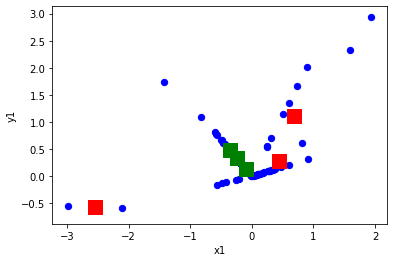

In [14]:
#plot after training.

plt.scatter(x1,x2, s =40, c='b')
plt.scatter(-0.08669009,  0.13345794, s=200, c='g', marker='s')
plt.scatter(-0.35726778,  0.4751098, s=200, c='g', marker='s')
plt.scatter(-2.54429036, -0.57217753, s=200, c='r', marker='s')
plt.scatter(0.68102341,  1.11048659, s=200, c='r', marker='s')
plt.scatter(-0.24553856,  0.32941525, s=200, c='g', marker='s')
plt.scatter(0.44052667,  0.27363771, s=200, c='r', marker='s')
plt.xlabel('x1')
plt.ylabel('y1')
plt.show()

In [70]:
Kmean.labels_

array([0, 0, 2, 0, 1, 3, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 5, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 5, 0, 0,
       4, 0, 4, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0,
       4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 5, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 4, 0, 4, 4,
       4, 0, 0, 0, 0, 5, 0, 4, 5, 0, 1, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 1, 0,
       4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0,
       4, 1, 4, 0, 0, 0, 0, 5, 4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5,
       0, 5, 3, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 4,
       0, 0, 0, 0, 4, 0, 5, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 3, 0])

In [79]:
sample_test=x_test
#second_test=sample_test.reshape(1, -1)
y_pred = Kmean.predict(sample_test)